#### breast_cancer.data Column Details


 Attribute Information: (class attribute has been moved to last column)<br>
<pre>
     Attribute                     Domain
   -- -----------------------------------------
1. Sample code number            id number
2. Clump Thickness               1 - 10
3. Uniformity of Cell Size       1 - 10
4. Uniformity of Cell Shape      1 - 10
5. Marginal Adhesion             1 - 10
6. Single Epithelial Cell Size   1 - 10
7. Bare Nuclei                   1 - 10
8. Bland Chromatin               1 - 10
9. Normal Nucleoli               1 - 10
10. Mitoses                      1 - 10
11. Class:                       (2 for benign, 4 for malignant)
</pre>

#### Classification Exercise

1) Read the dataset 'breast_cancer.data'<br>
2) Remove/handle the null values.<br>
3) Rename the column names appropritely as per the attribute info mentioned above<br>
4) Based on the general understanding of the dataset, select independent features and dependent feature<br>
5) Split the dataset into training and testing dataset with test_size 25%<br>
6) Apply Decision Tree Classification and predict the class for the test data.<br>
7) Find the confusion matrix, accuracy_score and generate classification_report.<br>
8) Apply Radom Forest Classification and predict the class for the test data.<br>
9) Find the confusion matrix, accuracy_score and generate classification_report.<br>


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/breast-cancer-wisconsin.csv')

In [ ]:
df.columns=['Sample code number','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']

In [ ]:
df.head(10)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4
5,1018099,1,1,1,1,2,10,3,1,1,2
6,1018561,2,1,2,1,2,1,3,1,1,2
7,1033078,2,1,1,1,2,1,1,1,5,2
8,1033078,4,2,1,1,2,1,2,1,1,2
9,1035283,1,1,1,1,1,1,3,1,1,2


In [ ]:
df.isnull().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [ ]:
df.columns

Index(['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [ ]:
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [ ]:
df['Bare Nuclei'].value_counts()

1     401
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [ ]:
df['Bare Nuclei'] = df['Bare Nuclei'].replace(['?'],5)

In [ ]:
df['Bare Nuclei'].value_counts()

1     401
10    132
2      30
5      30
3      28
8      21
4      19
5      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [ ]:
x=df.iloc[:,1:10]
y=df.iloc[:,-1]

print(type(x))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(523, 9)
(523,)
(175, 9)
(175,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='gini',min_samples_split=5,max_depth=10)

In [ ]:
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=5)

In [ ]:
model.score(x_test,y_test)

0.9485714285714286

In [ ]:
DT_acc=model.score(x_test,y_test)

In [ ]:
DT_pred=model.predict(x_test)

In [ ]:
DT_pred[:5]

array([4, 2, 2, 2, 2])

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
print(confusion_matrix(y_test,DT_pred))

[[112   2]
 [  7  54]]


In [ ]:
print(classification_report(y_test,DT_pred))

              precision    recall  f1-score   support

           2       0.94      0.98      0.96       114
           4       0.96      0.89      0.92        61

    accuracy                           0.95       175
   macro avg       0.95      0.93      0.94       175
weighted avg       0.95      0.95      0.95       175



**Using Random** **Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(criterion='gini',min_samples_split=5,max_depth=10,n_estimators=40)

In [ ]:
RF.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=40)

In [ ]:
RF.score(x_test,y_test)

0.9542857142857143

In [ ]:
RF_acc=RF.score(x_test,y_test)

In [ ]:
RF_pred=RF.predict(x_test)

In [ ]:
RF_pred[:5]

array([4, 2, 4, 2, 2])

In [ ]:
DT_pred[:5]

array([4, 2, 2, 2, 2])

In [ ]:
print(confusion_matrix(y_test,RF_pred))

[[111   3]
 [  5  56]]


In [ ]:
print(classification_report(y_test,RF_pred))

              precision    recall  f1-score   support

           2       0.96      0.97      0.97       114
           4       0.95      0.92      0.93        61

    accuracy                           0.95       175
   macro avg       0.95      0.95      0.95       175
weighted avg       0.95      0.95      0.95       175



In [ ]:
df.corr()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Sample code number,1.000000,-0.055276,-0.041735,-0.041717,-0.065003,-0.045630,-0.060082,-0.052188,-0.034961,-0.080378
Clump Thickness,-0.055276,1.000000,0.645366,0.655089,0.486699,0.522108,0.558511,0.536176,0.350176,0.716509
Uniformity of Cell Size,-0.041735,0.645366,1.000000,0.906814,0.705397,0.751674,0.755824,0.722699,0.458548,0.817772
Uniformity of Cell Shape,-0.041717,0.655089,0.906814,1.000000,0.682871,0.719524,0.736066,0.719272,0.438756,0.818794
Marginal Adhesion,-0.065003,0.486699,0.705397,0.682871,1.000000,0.599402,0.666759,0.603132,0.417476,0.696605
Single Epithelial Cell Size,-0.045630,0.522108,0.751674,0.719524,0.599402,1.000000,0.616108,0.628704,0.478975,0.682618
Bland Chromatin,-0.060082,0.558511,0.755824,0.736066,0.666759,0.616108,1.000000,0.665914,0.344118,0.756732
Normal Nucleoli,-0.052188,0.536176,0.722699,0.719272,0.603132,0.628704,0.665914,1.000000,0.428185,0.712067
Mitoses,-0.034961,0.350176,0.458548,0.438756,0.417476,0.478975,0.344118,0.428185,1.000000,0.423008
Class,-0.080378,0.716509,0.817772,0.818794,0.696605,0.682618,0.756732,0.712067,0.423008,1.000000


In [ ]:
b=df.corr()

In [ ]:
import seaborn as sns

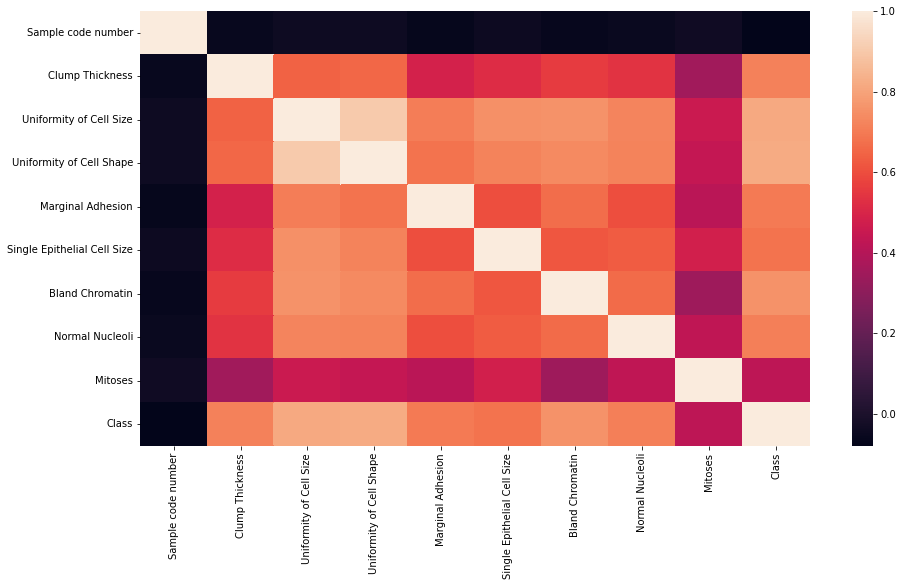

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(b)
plt.show()